## AE(Auto Encode)
---
- 표현(특징) 학습
    * 데이터에서 주요 특징을 찾아 압축 후 복원하는 학습 모델
                                                         
- 구성
    * 인코더(Encoder) : 입력 데이터에서 주요 특징 추출 / 압축
    * 디코더(Decoder) : 주요 특징에서 원본 데이터로 복원

In [8]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비 및 로딩
---

In [9]:
# load_data() 함수를 호출하면 NumPy 어레이의 튜플을 반환
mnist = load_data()
(X_train, y_train), (X_test, y_test) = load_data()
print(f'X_train.shape : {X_train.shape}\ny_train.shape : {y_train.shape}')
print(f'X_test.shape  : {X_test.shape}\ny_test.shape  : {y_test.shape}')

X_train.shape : (60000, 28, 28)
y_train.shape : (60000,)
X_test.shape  : (10000, 28, 28)
y_test.shape  : (10000,)


In [10]:
# mnist

## [2] 데이터 전처리 및 학습형태로 변환

In [11]:
# 스케일링 => 픽셀 / 255.0
X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
# Dense로 1차원을 넣어야 하기 때문에
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)   

In [13]:
print(f'X_train.shape : {X_train.shape}')  # 학습용
print(f'X_test.shape  : {X_test.shape}')   # 테스트용

X_train.shape : (60000, 784)
X_test.shape  : (10000, 784)


In [14]:
# 1차원으로 reshape안해준다면, 아래 compile()과정에서
# model = Sequential()
# model.add(Flatten(input_shape=(28, 28))) 로 첫 레이어 층을 시작하면 됨
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='softmax'))

In [15]:
# 검증용 데이터셋 준비
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  stratify = y_train,
                                                  random_state=11)

In [16]:
print(f'X_train.shape : {X_train.shape}\nX_val.shape   : {X_val.shape}\nX_test.shape  : {X_test.shape}')
print(f'y_train.shape : {y_train.shape}\ny_val.shape   : {y_val.shape}\ny_test.shape  : {y_test.shape}')

X_train.shape : (45000, 784)
X_val.shape   : (15000, 784)
X_test.shape  : (10000, 784)
y_train.shape : (45000,)
y_val.shape   : (15000,)
y_test.shape  : (10000,)


## [3] 모델 구성 및 생성

In [17]:
# 노드 수 조절하도록 모델 만드는 함수
def createAEModel(n_node):
    model = Sequential()
    # 입력 (784)
    model.add(Dense(units=n_node, activation='relu', input_shape=(784,)))  # 입력되는 노드수는 정해져있즤오
    # 출력 (784)
    model.add(Dense(784, activation='sigmoid')) # 784같은 수는 변수로 둠
#     model.add(Dense(10, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer = 'adam') #, metrics='accuracy')
    return model   

In [18]:
oneModel = createAEModel(10)
twoModel = createAEModel(300)
thrModel = createAEModel(500)

In [19]:
# 시각화
# plot_model(oneModel, show_shapes=True)

## [4] 모델 학습

In [20]:
### X값, y값 모두 입력 데이터로 (X도 내꺼, y도 내꺼) => 오토인코더니까
import tensorflow as tf
with tf.device("/device:CPU:0"):
    print('CPU')
    oneModel.fit(X_train, X_train, epochs=10)
    twoModel.fit(X_train, X_train, epochs=10)
    thrModel.fit(X_train, X_train, epochs=10)
# with tf.device("/device:GPU:0"):
#     print('GPU')
#     oneModel.fit(X_train, X_train, epochs=10)
#     twoModel.fit(X_train, X_train, epochs=10)
#     thrModel.fit(X_train, X_train, epochs=10)

CPU
Epoch 1/10
1407/1407 [==============================] - 1s 746us/step - loss: 0.0522
Epoch 2/10
1407/1407 [==============================] - 1s 741us/step - loss: 0.0344
Epoch 3/10
1407/1407 [==============================] - 1s 718us/step - loss: 0.0327
Epoch 4/10
1407/1407 [==============================] - 1s 744us/step - loss: 0.0317
Epoch 5/10
1407/1407 [==============================] - 1s 742us/step - loss: 0.0312
Epoch 6/10
1407/1407 [==============================] - 1s 754us/step - loss: 0.0308
Epoch 7/10
1407/1407 [==============================] - 1s 715us/step - loss: 0.0306
Epoch 8/10
1407/1407 [==============================] - 1s 733us/step - loss: 0.0304
Epoch 9/10
1407/1407 [==============================] - 1s 724us/step - loss: 0.0303
Epoch 10/10
1407/1407 [==============================] - 1s 717us/step - loss: 0.0302
Epoch 1/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.0145
Epoch 2/10
1407/1407 [==============================] - 2s 2ms

In [21]:
oneModel.evaluate(X_test, X_test)
twoModel.evaluate(X_test, X_test)
thrModel.evaluate(X_test, X_test)

313/313 [==============================] - 0s 1ms/step - loss: 9.3525e-04


0.0009352466440759599

## [5] 예측
---
- 새로운 데이터 사용

In [22]:
# 입력에 들어가는 값이 그대로 y값으로 들어가는 것
pre = oneModel.predict(X_val[0].reshape(-1,784))
pre2 = twoModel.predict(X_val[0].reshape(-1,784))
pre3 = thrModel.predict(X_val[0].reshape(-1,784))

1/1 [==============================] - 0s 32ms/step


In [23]:
pre.shape
pre2.shape
pre3.shape

(1, 784)

## 원본 이미지 - AE 진행된 이미지 비교

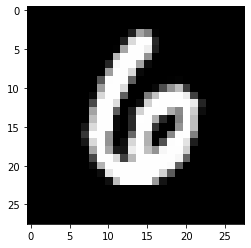

In [24]:
plt.imshow(X_val[0].reshape(28,28), cmap='gray')
plt.show()

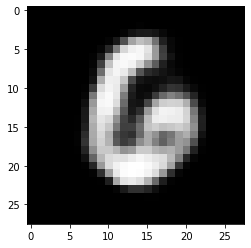

In [25]:
plt.imshow(pre.reshape(28,28), cmap='gray')
plt.show()

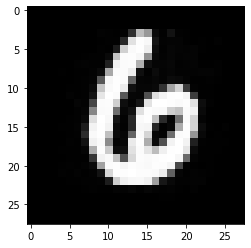

In [26]:
plt.imshow(pre2.reshape(28,28), cmap='gray')
plt.show()

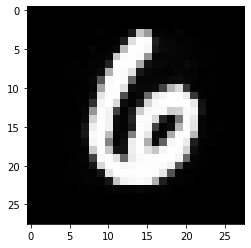

In [27]:
plt.imshow(pre3.reshape(28,28), cmap='gray')
plt.show()

In [ ]:
# 300개나 500개나 비슷하다면 => 300개를 선택해야제